In [35]:
from google.colab import files
uploaded = files.upload()

Saving products_with_scores.csv to products_with_scores.csv


Гипотеза метрики  
Метрика "Оценка качества продукта" предполагает, что программа автоматически оценивает качество продукта на основе определённых параметров и вычисляет разницу межде Score_X и Score_y.  
Для проверки точности работы программы мы выбираем случайную выборку из 100 продуктов и сравниваем их автоматически рассчитанные значениями Score с размеченными вручную оценками Our_Score.
Если различие между этими оценками незначительно, это свидетельствует о корректной работе алгоритма

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Загрузка CSV-файла
file_path = '/content/products_with_scores.csv'
data = pd.read_csv(file_path)

# Проверка структуры данных
print("Первые строки исходного файла:")
print(data.head())

# 2. Случайная выборка 100 продуктов
random_sample = data[['Product Name', 'Score']].sample(n=100, random_state=42)

# Сохранение исходной выборки с данными в Score
original_sample_file = 'original_random_sample.csv'
random_sample.to_csv(original_sample_file, index=False)
data2= pd.read_csv(original_sample_file)
print(f"Сохранена исходная выборка с данными: {original_sample_file}")

# 3. Заменяем значения в столбце 'Score' на NaN для последующей разметки
random_sample['Score'] = np.nan

# Сохранение выборки для ручной разметки
annotation_sample_file = 'random_sample_for_annotation.csv'
random_sample.to_csv(annotation_sample_file, index=False)
print(f"Сохранена выборка для разметки: {annotation_sample_file}")


Первые строки исходного файла:
                   Product Name       PLU UOM  Step  Rating  Rates Count  \
0              Кофе Латте 330мл  78034281  шт   1.0    4.73         2087   
1   Кофе Большой Капучино 270мл  78034282  шт   1.0    4.69         1191   
2   Кофе Американо Гранде 320мл  78034285  шт   1.0    4.69          518   
3          Кофе Флэт Уайт 200мл  78034280  шт   1.0    4.56          339   
4  Кофе Большой Американо 230мл  78034284  шт   1.0    4.80          198   

   Price Property Clarification  Weight  Nutrients Protein  Nutrients Fat  \
0  99.99                 330 мл   330.0               6.84           6.85   
1  99.99                 270 мл   270.0               5.25           5.26   
2  79.99                 320 мл   320.0               0.47           0.48   
3  99.99                 200 мл   200.0               4.81           4.83   
4  49.99                 230 мл   230.0               0.41           0.42   

   Nutrients Carbs  Nutrients Calories  Score  
0

In [37]:
from google.colab import files
uploaded = files.upload()

Saving random_sample_for_annotation.csv to random_sample_for_annotation (1).csv


                                        Product Name  Score
0  Напиток Черноголовка Кола без сахара газирован...      2
1                Биотворог Верховье Персик 4.2% 120г      6
2                                             Лимоны      9
3                        Кефир ЭкоНива 3.2% БЗМЖ 1кг      9
4    Фасоль Bonduelle печеная со сладким перцем 360г      7
                                        Product Name  Score_x  Score_y
0  Напиток Черноголовка Кола без сахара газирован...     4.00        2
1                Биотворог Верховье Персик 4.2% 120г     8.00        6
2                                             Лимоны     7.67        9
3                        Кефир ЭкоНива 3.2% БЗМЖ 1кг     8.00        9
4    Фасоль Bonduelle печеная со сладким перцем 360г     8.00        7
График сохранён как comparison_plot.png


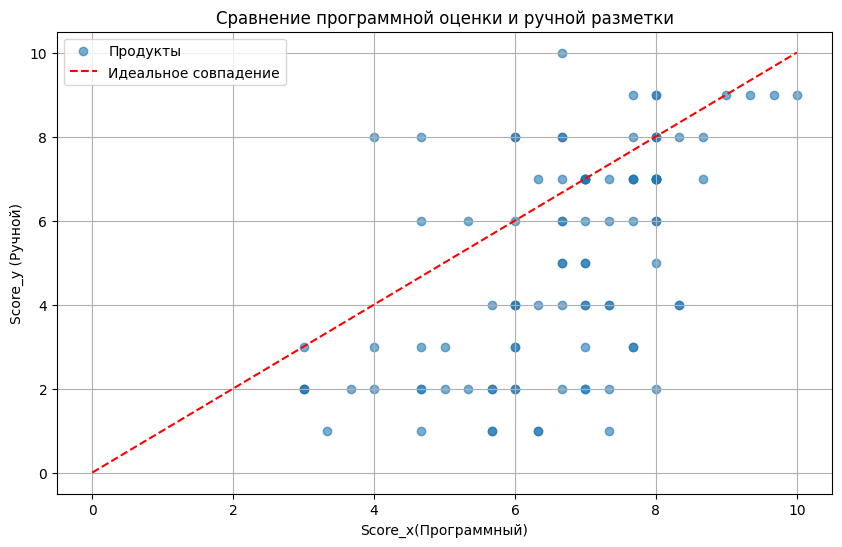

Среднее абсолютное отклонение (MAE): 2.08


In [45]:
# После разметки загрузите данные с ручной оценкой.
annotated_file_path = '/content/random_sample_for_annotation (1).csv'
annotated_data = pd.read_csv(annotated_file_path)

# Проверка структуры размеченных данных
print(annotated_data.head())

# 3. Объединение таблиц
combined_data = data2.merge(annotated_data, on='Product Name')

# Проверка объединённой таблицы
print(combined_data.head())

# 4. Визуализация различий
plt.figure(figsize=(10, 6))

plt.scatter(combined_data['Score_x'], combined_data['Score_y'], alpha=0.6, label='Продукты')
plt.plot([0, 10], [0, 10], 'r--', label='Идеальное совпадение')  # Диагональ для визуализации идеального совпадения

plt.xlabel('Score_x(Программный)')
plt.ylabel('Score_y (Ручной)')
plt.title('Сравнение программной оценки и ручной разметки')
plt.legend()
plt.grid()

# Сохранение графика
plt.savefig('comparison_plot.png')
print("График сохранён как comparison_plot.png")

plt.show()

# 5. Анализ различий
combined_data['difference'] = combined_data['Score_x'] - combined_data['Score_y']
mae = combined_data['difference'].abs().mean()  # Средняя абсолютная ошибка
print(f"Среднее абсолютное отклонение (MAE): {mae:.2f}")

Выводы на основе данных
Если MAE низкий (например, менее 5), это свидетельствует о высоком качестве программной оценки.
Если MAE высокий, возможно, потребуется уточнить алгоритм, который рассчитывает score.

Метрика "Оценка качества алгоритма на основе содержания белков"

Предполагается, что продукты с высоким содержанием белков должны получать высокие оценки качества (Score > 6).
Мы проверяем это предположение, анализируя нутриентный состав продуктов (белки, жиры, углеводы). Продукты, у которых соотношение белков значительно выше по сравнению с другими нутриентами, будут считаться высокобелковыми. Затем мы оцениваем, как часто такие продукты получают высокие оценки (Score>6), и визуализируем результаты.

Если таких продуктов больше 90%, то механизм оценки качества продуктов удовлетворяет задач программы

                   Product Name       PLU UOM  Step  Rating  Rates Count  \
0              Кофе Латте 330мл  78034281  шт   1.0    4.73         2087   
1   Кофе Большой Капучино 270мл  78034282  шт   1.0    4.69         1191   
2   Кофе Американо Гранде 320мл  78034285  шт   1.0    4.69          518   
3          Кофе Флэт Уайт 200мл  78034280  шт   1.0    4.56          339   
4  Кофе Большой Американо 230мл  78034284  шт   1.0    4.80          198   

   Price Property Clarification  Weight  Nutrients Protein  Nutrients Fat  \
0  99.99                 330 мл   330.0               6.84           6.85   
1  99.99                 270 мл   270.0               5.25           5.26   
2  79.99                 320 мл   320.0               0.47           0.48   
3  99.99                 200 мл   200.0               4.81           4.83   
4  49.99                 230 мл   230.0               0.41           0.42   

   Nutrients Carbs  Nutrients Calories  Score  
0             9.65              

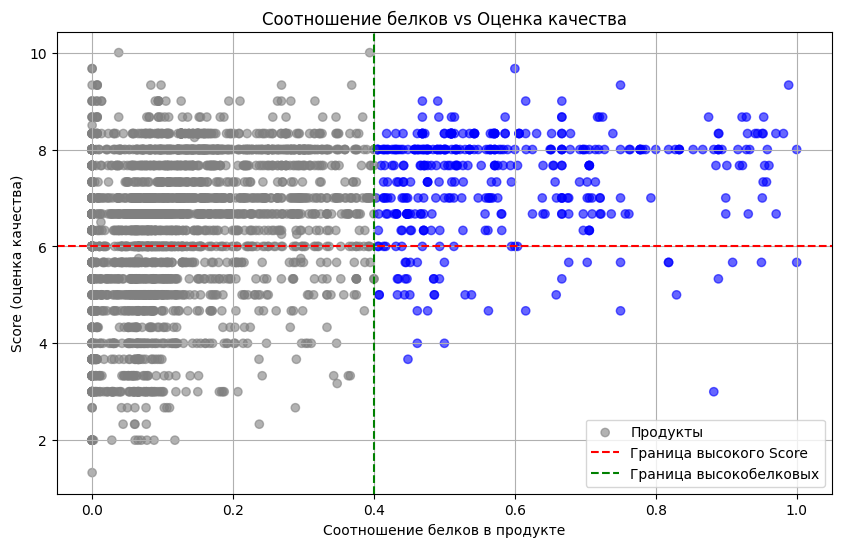

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Загрузка CSV-файла
file_path = '/content/products_with_scores.csv'
data = pd.read_csv(file_path)

# Предполагается, что файл содержит столбцы: 'protein', 'fat', 'carbohydrate', 'score'.
print(data.head())

# 2. Определение высокобелковых продуктов
# Критерий: процентное содержание белков больше 40% от суммы всех нутриентов
data['nutrient_sum'] = data['Nutrients Protein'] + data['Nutrients Fat'] + data['Nutrients Carbs']
data['protein_ratio'] = data['Nutrients Protein'] / data['nutrient_sum']
data['high_protein'] = data['protein_ratio'] > 0.4

# 3. Анализ: доля высокобелковых продуктов с оценкой `Score > 6`
data['high_score'] = data['Score'] > 6
high_protein_high_score = data[data['high_protein'] & data['high_score']]

# Процент высокобелковых продуктов с высоким Score
high_protein_count = data['high_protein'].sum()
high_protein_high_score_count = high_protein_high_score.shape[0]
percentage = (high_protein_high_score_count / high_protein_count) * 100

print(f"Всего высокобелковых продуктов: {high_protein_count}")
print(f"Из них с высокой оценкой (Score > 6): {high_protein_high_score_count}")
print(f"Процент высокобелковых продуктов с высокой оценкой: {percentage:.2f}%")

# 4. Построение ковариационной матрицы
# Ковариация между содержанием нутриентов и оценкой качества
cov_matrix = data[['Nutrients Protein', 'Nutrients Fat', 'Nutrients Carbs', 'Score']].cov()
print("Ковариационная матрица:")
print(cov_matrix)

# 5. Визуализация: диаграмма распыления
plt.figure(figsize=(10, 6))

# Продукты: цвет зависит от принадлежности к категории высокобелковых
colors = np.where(data['high_protein'], 'blue', 'gray')

plt.scatter(data['protein_ratio'], data['Score'], c=colors, alpha=0.6, label='Продукты')
plt.axhline(6, color='red', linestyle='--', label='Граница высокого Score')
plt.axvline(0.4, color='green', linestyle='--', label='Граница высокобелковых')

plt.xlabel('Соотношение белков в продукте')
plt.ylabel('Score (оценка качества)')
plt.title('Соотношение белков vs Оценка качества')
plt.legend()
plt.grid()

# Сохранение графика
plt.savefig('high_protein_scatter.png')
print("График сохранён как high_protein_scatter.png")

plt.show()

Как интерпретировать ковариационную матрицу и график
Ковариационная матрица:

Если ковариация между protein и score высокая и положительная, это подтверждает гипотезу, что продукты с большим содержанием белков получают высокие оценки.
Низкая или отрицательная ковариация между жирами/углеводами и score может говорить о том, что высокие значения этих нутриентов не способствуют высоким оценкам.
Диаграмма распыления:

Точки справа от линии protein_ratio = 0.4 показывают высокобелковые продукты.
Высокие оценки (score > 6) визуально выделяются выше линии y = 6.
Сосредоточение синих точек в верхней правой области подтверждает гипотезу.

Гипотеза метрики

Название: Соотношение цена-качество

Мы предполагаем, что высокий показатель качества продукта (Score > 7) можно достичь без значительных затрат на единицу массы продукта. То есть существует достаточное количество продуктов, у которых соотношение "цена/масса" остается умеренным при высоком Score.

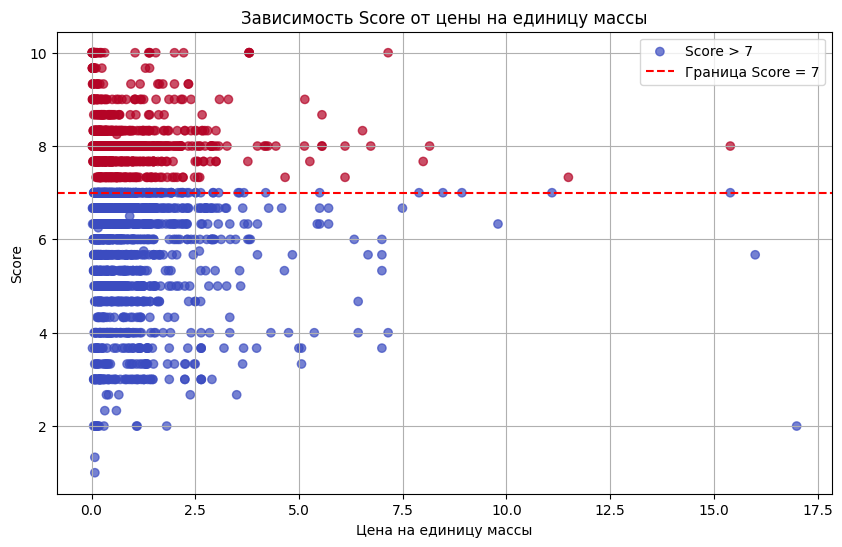

Гипотеза опровергнута: высокое качество связано с высокой ценой.
Процент доступных высококачественных продуктов: 50.00%


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "/content/products_with_scores.csv"
data = pd.read_csv(file_path)

# 2. Фильтрация данных: оставляем только продукты с указанной ценой
data = data[data["Price"].notna()]

# 3. Проверка наличия нужных столбцов
required_columns = ["Price", "Weight", "Score"]
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"Отсутствуют необходимые столбцы: {required_columns}")

# 4. Расчет соотношения "цена/масса"
data["Цена_на_единицу_массы"] = data["Price"] / data["Weight"]

# 5. Построение графика зависимости
plt.figure(figsize=(10, 6))
plt.scatter(data["Цена_на_единицу_массы"], data["Score"], alpha=0.7, c=data["Score"] > 7, cmap="coolwarm", label="Score > 7")
plt.axhline(7, color='red', linestyle='--', label="Граница Score = 7")
plt.xlabel("Цена на единицу массы")
plt.ylabel("Score")
plt.title("Зависимость Score от цены на единицу массы")
plt.legend()
plt.grid()
plt.show()

# 6. Анализ гипотезы
high_quality = data[data["Score"] > 7]
low_price_high_quality = high_quality[high_quality["Цена_на_единицу_массы"] < high_quality["Цена_на_единицу_массы"].median()]

# Процент высококачественных продуктов с умеренной ценой
percent_high_quality_affordable = len(low_price_high_quality) / len(high_quality) * 100

# 7. Вывод результатов
if percent_high_quality_affordable > 50:
    hypothesis_result = "Гипотеза подтверждена: большинство высококачественных продуктов имеют умеренную цену."
else:
    hypothesis_result = "Гипотеза опровергнута: высокое качество связано с высокой ценой."

print(hypothesis_result)
print(f"Процент доступных высококачественных продуктов: {percent_high_quality_affordable:.2f}%")


Ожидаемые графические результаты

Если гипотеза верна: большая часть точек с Score > 7 находится в области с низкими значениями по оси X.

Если гипотеза неверна: точки с Score > 7 будут сгруппированы ближе к высоким значениям на оси X.

Описание метрики

Название: Топ 100 товаров на основе рейтинга и их калорийность

Цель: Проверить наличие корреляции между калорийностью продуктов и их рейтингом (Score). Мы предполагаем, что высококалорийные продукты не должны автоматически попадать в категорию продуктов с высоким Score.

Основная гипотеза:

Алгоритм не связывает высокую калорийность с высоким значением Score. Это подтверждается, если продукты, входящие в топ-100 по Score, в значительной степени не пересекаются с продуктами, входящими в топ-100 по калорийности.

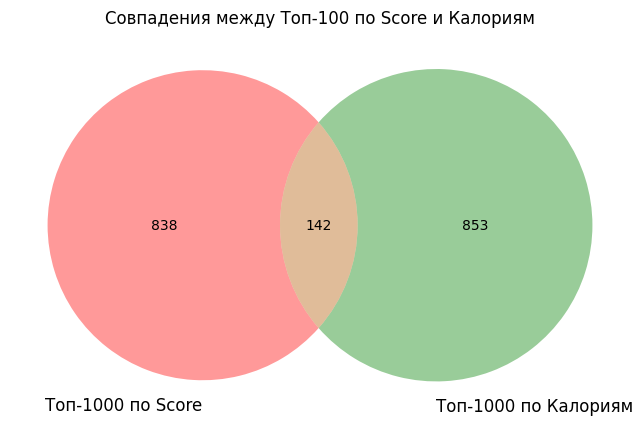

Совпадений: 142
Уникальных в Топ-1000 по Score: 838
Уникальных в Топ-1000 по Калориям: 853


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# 1. Загрузка данных
file_path = "/content/products_with_scores.csv"
data = pd.read_csv(file_path)

# 2. Проверка наличия нужных столбцов
required_columns = ["Score", "Nutrients Calories"]
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"Отсутствуют необходимые столбцы: {required_columns}")

# 3. Выделение топ-100 продуктов по Score и Калориям
top_1000_score = data.nlargest(1000, "Score")["Product Name"]  # Название продукта в столбце "Название"
top_1000_calories = data.nlargest(1000, "Nutrients Calories")["Product Name"]

# 4. Нахождение совпадений
common_products = set(top_1000_score).intersection(set(top_1000_calories))
unique_score_products = set(top_1000_score) - common_products
unique_calories_products = set(top_1000_calories) - common_products

# 5. Визуализация с помощью венновой диаграммы
plt.figure(figsize=(8, 8))
venn = venn2(
    subsets=(
        len(unique_score_products),
        len(unique_calories_products),
        len(common_products),
    ),
    set_labels=("Топ-1000 по Score", "Топ-1000 по Калориям"),
)
plt.title("Совпадения между Топ-100 по Score и Калориям")
plt.show()

# 6. Описание результатов
print(f"Совпадений: {len(common_products)}")
print(f"Уникальных в Топ-1000 по Score: {len(unique_score_products)}")
print(f"Уникальных в Топ-1000 по Калориям: {len(unique_calories_products)}")


Описание графического результата  
На графике венновой диаграммы:

Круг 1 (слева): Продукты, попавшие в топ-100 по Score, но не входящие в топ-100 по калориям.

Круг 2 (справа): Продукты, попавшие в топ-100 по Калориям, но не входящие в топ-100 по Score.

Перекрытие: Продукты, которые входят в оба топ-100.

Результаты и интерпретация

Если область перекрытия мала, это подтверждает гипотезу: алгоритм не связывает высокую калорийность с высоким рейтингом.

Если область перекрытия значительна, это означает, что калорийность может влиять на высокий Score, что требует доработки алгоритма.

Количество совпадений помогает количественно выразить степень связи между калорийностью и рейтингом.

In [19]:
data.describe()


,PLU,Step,Rating,Rates Count,Price,Weight,Nutrients Protein,Nutrients Fat,Nutrients Carbs,Nutrients Calories,Score,nutrient_sum,protein_ratio
count,7.340000e+02,734.000000,734.000000,734.000000,618.000000,734.000000,734.000000,734.000000,734.000000,734.000000,730.000000,734.000000,729.000000
mean,7.916359e+06,0.910422,4.865150,13066.562670,130.044159,263.532698,6.559414,16.056172,36.486948,311.164101,6.632096,59.102534,0.135879
std,1.775578e+07,0.279819,0.086864,33009.539772,139.681260,351.334747,5.501975,23.079073,24.042255,189.858720,2.695404,36.612071,0.102036
min,2.500000e+01,0.100000,4.210000,11.000000,11.990000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,3.401788e+06,1.000000,4.840000,3157.250000,59.990000,100.000000,2.625000,1.025000,10.600000,149.000000,5.670000,29.575000,0.065574
50%,4.089240e+06,1.000000,4.890000,5532.000000,99.990000,200.000000,6.000000,10.700000,42.170000,302.900000,6.670000,64.750000,0.106858
75%,4.316586e+06,1.000000,4.920000,10822.750000,164.990000,300.000000,8.100000,26.600000,56.000000,490.000000,7.670000,89.000000,0.175050
max,7.803546e+07,3.000000,5.000000,399972.000000,2299.000000,5000.000000,53.000000,483.000000,97.000000,707.000000,67.750000,529.000000,0.781250
